In [1]:
#What age groups appeared to have the highest vaccination rates?
#Did the majority of the countries provided in this dataset have the same age groups that had the 
#highest vaccination rates? Were there any that deviated from the norm?

#Did age group or manufacturer affect the total number of fully vaccinated, boosters or partial 
#vaccinations?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


resources = "Resources"
vac_agegroup_csv = "vaccinations-by-age-group.csv"
vac_manufacturer_csv = "vaccinations-by-manufacturer.csv"

file_path = f"../{resources}/{vac_agegroup_csv}"
vac_agegroup = pd.read_csv(file_path)

file_path_2 = f"../{resources}/{vac_manufacturer_csv}"
vac_manufacturer = pd.read_csv(file_path_2)

print(vac_agegroup.shape)
vac_agegroup.head()

(72540, 6)


,location,date,age_group,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_with_booster_per_hundred
0,Argentina,2020-01-01,100+,0.0,0.0,0.0
1,Argentina,2020-01-01,12-17,0.0,0.0,0.0
2,Argentina,2020-01-01,18-29,0.0,0.0,0.0
3,Argentina,2020-01-01,3-11,0.0,0.0,0.0
4,Argentina,2020-01-01,30-39,0.0,0.0,0.0


In [3]:
print(vac_agegroup['location'].nunique())
locations = vac_agegroup['location'].unique()
locations

38


array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bulgaria',
       'Canada', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Jersey', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway',
       'Peru', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Uruguay'], dtype=object)

In [4]:
print(vac_agegroup['age_group'].nunique())
age_groups = vac_agegroup['age_group'].unique()
age_groups

46


array(['100+', '12-17', '18-29', '3-11', '30-39', '40-49', '50-59',
       '60-69', '70-79', '80-89', '90-99', '16-19', '20-29', '90+',
       '12-15', '5-11', '0-4', '15-17', '18-24', '25-49', '5-9', '80+',
       '10-14', '0-17', '0-15', '16-69', '18-69', '0-19', '12-64', '65+',
       '0-5', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '16-17', '0-9', '10-19', '25-34', '35-44', '45-54', '55-64',
       '65-74', '75+'], dtype=object)

In [5]:
# STANDARD_AGE_GROUPS_BE = ['0-17', '18-24', '25-49', '50-59', '60-69', '70-79', '80+']
# STANDARD_AGE_GROUPS_AT = ['0-4','10-14','15-17','18-24','25-49','5-9','50-59','60-69','70-79','80+']
# STANDARD_AGE_GROUPS_AU = ['12-15','16-19','20-29','30-39','40-49','5-11','50-59','60-69','70-79','80-89','90+']
# STANDARD_AGE_GROUPS_FI = ['10-14','15-17','18-24','25-49','5-9','50-59','60-69','70-79','80+']
# STANDARD_AGE_GROUPS_AR = ['100+','12-17','18-29','3-11','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
# STANDARD_AGE_GROUPS_CA = ['0-15','0-4','12-17','16-69','18-29','18-69','30-39','40-49','5-11','50-59','60-69','70-79','80+']
# STANDARD_AGE_GROUPS_HK = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80+']
# STANDARD_AGE_GROUPS_JA = ['0-5', '12-64', '5-11', '65+']
# STANDARD_AGE_GROUPS_JE = ['12-15','16-17','18-29','30-39','40-49','5-11','50-54','55-59','60-64','65-69','70-74','75-79','80+']
# STANDARD_AGE_GROUPS_SE = ['15-17', '18-24', '25-49', '50-59', '60-69', '70-79', '80+']
# STANDARD_AGE_GROUPS_SW = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+']
# STANDARD_AGE_GROUPS_UY = ['12-17','18-24','25-34','35-44','45-54','55-64','65-74','75+']

In [6]:
def mapper(age_group):
    if '-' in age_group:
        age_range = age_group.split('-')
        lower_age = int(age_range[0])
        upper_age = int(age_range[1])
        if lower_age <= 17 and upper_age <= 17:
            return '0-17'
        elif lower_age >= 18 and upper_age <= 39:
            return '18-39'
        elif lower_age >= 40 and upper_age <= 59:
            return '40-59'
        else:
            return '60+'
    else:
        if int(age_group[:2]) == 10 or int(age_group[:2]) >= 60:
            return '60+'

In [7]:
all_age_groups = ['0-17', '18-24', '25-49', '50-59', '60-69', '70-79', '80+','0-4','10-14','15-17','18-24','25-49','5-9','50-59','60-69','70-79','80+'
,'12-15','16-19','20-29','30-39','40-49','5-11','50-59','60-69','70-79','80-89','90+','10-14','15-17','18-24','25-49','5-9','50-59','60-69','70-79','80+'
,'100+','12-17','18-29','3-11','30-39','40-49','50-59','60-69','70-79','80-89','90-99','0-15','0-4','12-17','16-69','18-29','18-69','30-39','40-49','5-11','50-59','60-69','70-79','80+'
,'0-19','20-29','30-39','40-49','50-59','60-69','70-79','80+','0-5', '12-64', '5-11', '65+',
'12-15','16-17','18-29','30-39','40-49','5-11','50-54','55-59','60-64','65-69','70-74','75-79','80+',
'15-17', '18-24', '25-49', '50-59', '60-69', '70-79', '80+',
'0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+','12-17','18-24','25-34','35-44','45-54','55-64','65-74','75+']
len(all_age_groups)

110

In [8]:
original_age_group = list(set(all_age_groups))
print(original_age_group)

['16-69', '10-19', '75-79', '40-49', '60-69', '5-11', '50-59', '0-15', '65-74', '0-19', '60-64', '90+', '3-11', '25-34', '80-89', '30-39', '0-5', '12-15', '65-69', '55-64', '0-17', '20-29', '50-54', '0-4', '18-29', '10-14', '18-24', '80+', '5-9', '90-99', '18-69', '16-17', '70-74', '0-9', '45-54', '55-59', '16-19', '70-79', '35-44', '12-64', '25-49', '15-17', '12-17', '75+', '65+', '100+']


In [9]:
new_age_group = [mapper(age) for age in original_age_group]
print(new_age_group)

['60+', '60+', '60+', '40-59', '60+', '0-17', '40-59', '0-17', '60+', '60+', '60+', '60+', '0-17', '18-39', '60+', '18-39', '0-17', '0-17', '60+', '60+', '0-17', '18-39', '40-59', '0-17', '18-39', '0-17', '18-39', '60+', '0-17', '60+', '60+', '0-17', '60+', '0-17', '40-59', '40-59', '60+', '60+', '60+', '60+', '60+', '0-17', '0-17', '60+', '60+', '60+']


In [10]:
df = vac_agegroup.copy()

In [11]:
df['Grouped_Age'] = df['age_group'].map(dict(zip(original_age_group, new_age_group)))

In [12]:
df[['age_group', 'Grouped_Age']]

,age_group,Grouped_Age
0,100+,60+
1,12-17,0-17
2,18-29,18-39
3,3-11,0-17
4,30-39,18-39
...,...,...
72535,35-44,60+
72536,45-54,40-59
72537,55-64,60+
72538,65-74,60+


In [13]:
df['Grouped_Age'].unique()

array(['60+', '0-17', '18-39', '40-59'], dtype=object)

In [14]:
vac_per_country_max= df.groupby(['location','Grouped_Age'])[['people_fully_vaccinated_per_hundred','people_vaccinated_per_hundred', 'people_with_booster_per_hundred']].max()

In [15]:
vac_per_country_max.reset_index(inplace=True)
vac_per_country_max

,location,Grouped_Age,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred
0,Argentina,0-17,68.01,92.05,44.05
1,Argentina,18-39,90.03,100.02,78.05
2,Argentina,40-59,90.64,99.45,117.12
3,Argentina,60+,92.01,113.85,162.90
4,Australia,0-17,80.45,84.97,NaN
...,...,...,...,...,...
144,Switzerland,60+,NaN,93.09,NaN
145,Uruguay,0-17,6.73,56.50,NaN
146,Uruguay,18-39,62.59,74.49,NaN
147,Uruguay,40-59,78.39,84.00,NaN


In [75]:
vac_per_country_rates= df.groupby(['location','Grouped_Age'])[['people_fully_vaccinated_per_hundred','people_vaccinated_per_hundred', 'people_with_booster_per_hundred']].mean()
vac_per_country_rates.reset_index(inplace=True)
vac_per_country_rates

,location,Grouped_Age,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred
0,Argentina,0-17,34.212455,47.780044,11.560745
1,Argentina,18-39,49.967750,60.857690,28.660366
2,Argentina,40-59,50.771840,63.074033,45.595124
3,Argentina,60+,52.452394,66.297962,55.493283
4,Australia,0-17,61.180133,72.344335,NaN
...,...,...,...,...,...
144,Switzerland,60+,NaN,68.340921,NaN
145,Uruguay,0-17,0.070842,1.153474,NaN
146,Uruguay,18-39,7.557368,15.727737,NaN
147,Uruguay,40-59,18.460842,37.437579,NaN


In [76]:
vac_per_country_rates_df = vac_per_country_rates[['location', 'Grouped_Age', 'people_fully_vaccinated_per_hundred']]
vac_per_country_rates_df

,location,Grouped_Age,people_fully_vaccinated_per_hundred
0,Argentina,0-17,34.212455
1,Argentina,18-39,49.967750
2,Argentina,40-59,50.771840
3,Argentina,60+,52.452394
4,Australia,0-17,61.180133
...,...,...,...
144,Switzerland,60+,NaN
145,Uruguay,0-17,0.070842
146,Uruguay,18-39,7.557368
147,Uruguay,40-59,18.460842


In [79]:
top_countries = vac_per_country_rates_df.sort_values('people_fully_vaccinated_per_hundred', ascending=False)
top_countries.head(10)

,location,Grouped_Age,people_fully_vaccinated_per_hundred
80,Jersey,60+,98.085578
66,Ireland,60+,90.021897
79,Jersey,40-59,87.027467
70,Israel,60+,84.775923
7,Australia,60+,84.448308
100,Malta,60+,83.900215
15,Belgium,60+,83.324838
65,Ireland,40-59,83.038085
53,Hong Kong,40-59,82.837799
62,Iceland,60+,82.103260


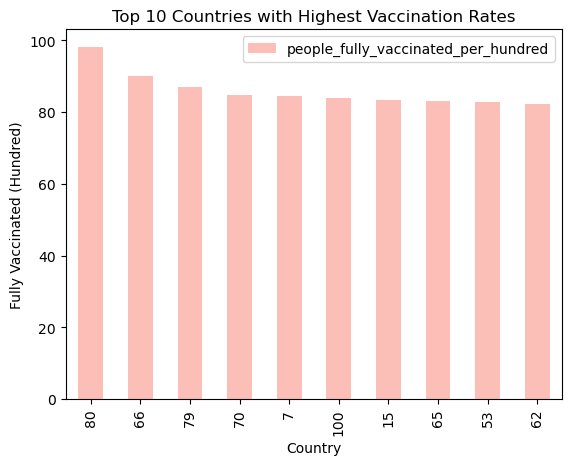

In [86]:


top__ten_countries_bar = top_countries[:10].plot(kind='bar', color='salmon', alpha=0.5, xlabel='Country', ylabel='Fully Vaccinated (Hundred)', title='Top 10 Countries with Highest Vaccination Rates')

In [65]:
outliers_countries = vac_per_country_rates.sort_values('people_fully_vaccinated_per_hundred', ascending=True)
outliers_countries.head(10)

,location,Grouped_Age,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred,people_with_booster_per_hundred
145,Uruguay,0-17,0.070842,1.153474,NaN
16,Bulgaria,0-17,1.847083,1.953000,0.096083
24,Croatia,0-17,5.117643,5.935626,0.176348
121,Romania,0-17,5.799590,6.195246,0.275164
129,Slovenia,0-17,7.278067,8.050000,0.188824
146,Uruguay,18-39,7.557368,15.727737,NaN
105,Norway,0-17,8.550741,22.629630,0.000000
75,Japan,0-17,12.438510,13.816815,2.583851
40,Estonia,0-17,12.578613,13.369562,1.148467
125,Slovakia,0-17,14.250620,15.904225,0.761239


In [17]:
# se_data = vac_per_country_rates[vac_per_country_rates['location'] == 'Switzerland']
# se_data

In [18]:
# Initialize a dictionary to store the age group with the most vaccinations for each country
max_fully_vac_by_country = {}

# Iterate over each unique country in the dataset
for country in vac_per_country_rates['location'].unique():
    if country != 'Switzerland':
        
        # Filter the data for the current country
        country_data = vac_per_country_rates[vac_per_country_rates['location'] == country]
        
        # Initialize variables to store the maximum vaccinations and corresponding age group
        max_vaccinations = 0
        max_age_group = None
        
        # Iterate over each unique age group in the country data
        for age_group in country_data['Grouped_Age'].unique():
            # Calculate the total vaccinations for the current age group
            total_vaccinations = country_data[country_data['Grouped_Age'] == age_group]['people_fully_vaccinated_per_hundred'].max()
            
            # Check if the total vaccinations for the current age group is greater than the current maximum
            if total_vaccinations > max_vaccinations:
                max_vaccinations = total_vaccinations
                max_age_group = age_group
        
        # Store the age group with the most vaccinations for the current country in the dictionary
        max_fully_vac_by_country[country] = max_age_group
    # Print the results
#for country, age_group in max_vaccinations_by_country.items():
    #print(f"Country: {country},  {age_group}")


In [19]:
index_values = ['age_group_max']
max_fully_vac_by_country_df = pd.DataFrame(max_fully_vac_by_country, index=index_values)
max_fully_vac_by_country_df

,Argentina,Australia,Austria,Belgium,Bulgaria,Canada,Croatia,Cyprus,Czechia,Denmark,...,Norway,Peru,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,Uruguay
age_group_max,60+,60+,60+,60+,40-59,40-59,40-59,60+,60+,60+,...,60+,60+,60+,60+,40-59,60+,60+,60+,60+,60+


In [28]:
fully_vac_df = max_fully_vac_by_country_df.transpose()
fully_vac_df.reset_index(inplace=True)
fully_vac_df.rename(columns={'index': 'location', '0': 'age_group_max'}, inplace=True)
fully_vac_df.head(37)

,location,age_group_max
0,Argentina,60+
1,Australia,60+
2,Austria,60+
3,Belgium,60+
4,Bulgaria,40-59
5,Canada,40-59
6,Croatia,40-59
7,Cyprus,60+
8,Czechia,60+
9,Denmark,60+


In [21]:
fully_vac_df['age_group_max'].unique()

array(['60+', '40-59', '18-39'], dtype=object)

In [22]:
fully_vac_df['age_group_max'].value_counts()

age_group_max
60+      30
40-59     6
18-39     1
Name: count, dtype: int64

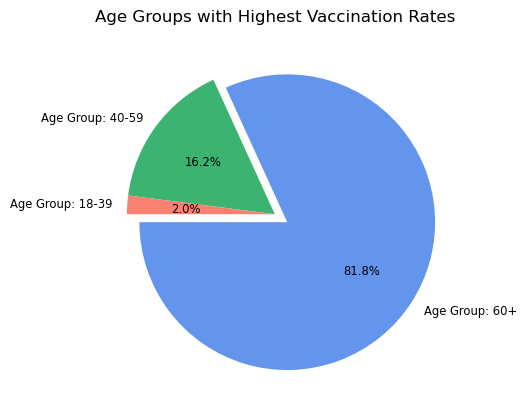

In [97]:
#pie plot

labels = 'Age Group: 60+', 'Age Group: 40-59', 'Age Group: 18-39'
sizes = [81, 16, 2]

explode = (0.1, 0, 0)

fig_age_country, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=['cornflowerblue','mediumseagreen','salmon'], startangle=180, textprops={'size': 'smaller'}, radius=1)
plt.title('Age Groups with Highest Vaccination Rates')
fig_age_country.savefig('../Images/Age_group_vac_rate.jpeg')

plt.show()


In [25]:
print(vac_manufacturer.shape)

(67944, 4)


In [26]:
print(vac_manufacturer['location'].nunique())
locations_total = vac_manufacturer['location'].unique()
locations_total

44


array(['Argentina', 'Austria', 'Belgium', 'Bulgaria', 'Canada', 'Chile',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Estonia',
       'Finland', 'France', 'Germany', 'Hong Kong', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malta', 'Nepal', 'Netherlands',
       'Norway', 'Peru', 'Poland', 'Portugal', 'Romania', 'Slovakia',
       'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Ukraine', 'United States', 'Uruguay',
       'European Union'], dtype=object)